## Imports

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.tsa.seasonal import seasonal_decompose


# plt.style.use('fivethirtyeight')

In [21]:
df = pd.read_csv("PJME_hourly.csv")
df["Datetime"] = pd.to_datetime(df["Datetime"]).sort_values()
df.set_index("Datetime", inplace=True)
df.sort_index()

,PJME_MW
Datetime,
2002-01-01 01:00:00,30393.0
2002-01-01 02:00:00,29265.0
2002-01-01 03:00:00,28357.0
2002-01-01 04:00:00,27899.0
2002-01-01 05:00:00,28057.0
...,...
2018-08-02 20:00:00,44057.0
2018-08-02 21:00:00,43256.0
2018-08-02 22:00:00,41552.0


In [22]:
print("Index:     " + str(df.index.dtype))
print(df.dtypes)

Index:     datetime64[ns]
PJME_MW    float64
dtype: object


## Dataset Description

This dataset contains energy consumption data for the East Region, measured in Mega Watts (MW). The dataset consists of a timestamp column and a corresponding column indicating the energy consumption.

### Features:

- **Datetime**: Timestamp indicating the time of energy consumption measurements.
- **PJME_MW**: Energy consumption in Mega Watts (MW) in the East Region.

The dataset provides a time series of energy consumption data, allowing for analysis and exploration of trends and patterns over time.

Mathematically, a forecasting model can be represented as a function $ f(x) $ that maps historical data $ x $ to predicted future values $ \hat{y} $. The general form of a forecasting model can vary depending on the specific problem and the underlying data characteristics.

Here's a basic mathematical representation:

$$\hat{y} = f(x)$$

Where:
-  $\hat{y}$ represents the predicted or forecasted value.
- $ x $ represents the historical data or features used for prediction.
- $ f(\cdot) $ represents the forecasting model, which can be a linear regression, time series analysis, machine learning algorithm, or any other mathematical function tailored to the problem domain.

For example, in linear regression, the forecasting model $ f(x) $ can be represented as:

$$\hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n$$

Where:
- $ \beta_0, \beta_1, \ldots, \beta_n $ are the coefficients or parameters estimated from the historical data $ x $.
- $ x_1, x_2, \ldots, x_n $ are the features or predictors used for forecasting.
- $ \hat{y} $ is the predicted value.

In time series analysis, forecasting models often involve autoregressive integrated moving average (ARIMA), exponential smoothing methods, or machine learning algorithms tailored to time series data. These models capture the temporal dependencies and patterns in the data to make predictions about future values.


## Cleaning and Finding Missing Data

First, let's check if there are any missing dates in the dataset.

In [23]:
missing_dates = pd.date_range(start=df.index.min(), end=df.index.max(), freq="H").difference(df.index)
missing_dates

DatetimeIndex(['2002-04-07 03:00:00', '2002-10-27 02:00:00',
               '2003-04-06 03:00:00', '2003-10-26 02:00:00',
               '2004-04-04 03:00:00', '2004-10-31 02:00:00',
               '2005-04-03 03:00:00', '2005-10-30 02:00:00',
               '2006-04-02 03:00:00', '2006-10-29 02:00:00',
               '2007-03-11 03:00:00', '2007-11-04 02:00:00',
               '2008-03-09 03:00:00', '2008-11-02 02:00:00',
               '2009-03-08 03:00:00', '2009-11-01 02:00:00',
               '2010-03-14 03:00:00', '2010-11-07 02:00:00',
               '2010-12-10 00:00:00', '2011-03-13 03:00:00',
               '2011-11-06 02:00:00', '2012-03-11 03:00:00',
               '2012-11-04 02:00:00', '2013-03-10 03:00:00',
               '2013-11-03 02:00:00', '2014-03-09 03:00:00',
               '2015-03-08 03:00:00', '2016-03-13 03:00:00',
               '2017-03-12 03:00:00', '2018-03-11 03:00:00'],
              dtype='datetime64[ns]', freq=None)

As we can see there are a few days where the dates that are missing lets try to interpolate using seosenal interpolation whit its neighors in order to create thoose enteries in the dataset

In [27]:

df.index.freq = 'H'
decomposition = seasonal_decompose(df["PJME_MW"], model="additive")

# Interpolate missing values within seasonal component
seasonal_component = decomposition.seasonal
interpolated_seasonal = seasonal_component.interpolate(method="linear", limit_direction="both")
# Recombine seasonal component with trend and residual components
reconstructed_data = decomposition.trend + interpolated_seasonal + decomposition.resid

# Update original DataFrame with interpolated values
df["Interpolated_PJME_MW"] = reconstructed_data

# Print DataFrame to view interpolated values
print(df)

ValueError: Inferred frequency None from passed values does not conform to passed frequency H

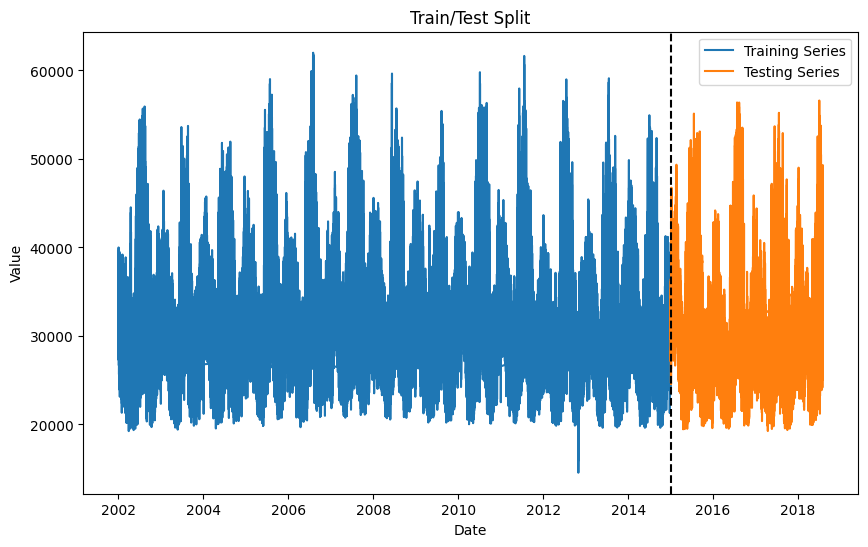

In [12]:
train = df[df.index < "01-01-2015"]
test = df[df.index > "01-01-2015"]

plt.figure(figsize=(10, 6))  # Set the figure size

plt.plot(train.index, train["PJME_MW"], label="Training Series")
plt.plot(test.index, test["PJME_MW"], label="Testing Series")


plt.title("Train/Test Split")
plt.axvline(pd.Timestamp("2015-01-01"), color="black", ls="--")

plt.xlabel("Date")
plt.ylabel("Value")

plt.legend(["Training Series", "Testing Series"])

plt.show()

In [ ]:
df.head()

In [ ]:
df.loc[(df.index > "01-01-2010") & (df.index < "01-08-2010")].plot(legend=False, title="One Weak")

In [ ]:
def create_features(df):    
    df = df.copy()
    df["hour"] = df.index.hour
    df["day_of_week"] = df.indexloc[first_date:last_date].dayofweek
    df["quarter"] = df.index.quarter
    df["month"] = df.index.month
    df["year"] = df.index.year
    df["day_of_year"] = df.index.dayofyear
    return df

In [ ]:
df = create_features(df)
df.head()

In [ ]:
ax = sns.boxenplot(data=df, x="hour", y="PJME_MW", legend=False)
ax.set_title("MW by hour")
ax.set_ylabel("MW")

In [ ]:
ax = sns.boxenplot(data=df, x="month", y="PJME_MW", legend=False)
ax.set_title("MW by hour")
ax.set_ylabel("MW")

In [ ]:
train = create_features(train)
test = create_features(test)

features = df.columns[(df.columns != "PJME_MW") & (df.columns != "Datetime")]
target = df.columns[1]

x_train = train[features]
y_train = train[target]

x_test = test[features]
y_test = test[target]

In [ ]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(x_train, y_train, eval_set=[(x_train, y_train), (x_test, y_test)], verbose=100)

In [ ]:
reg_final = pd.DataFrame(data=reg.feature_importances_,
                         index=reg.feature_names_in_,
                         columns=["importance"])

reg_final.sort_values("importance").plot(kind="barh", title="Feature Importance", legend=False)

In [ ]:
test["predictions"] = reg.predict(x_test)
df = df.merge(test["predictions"], how="left", left_index=True, right_index=True)

In [ ]:
ax = df["PJME_MW"].plot()
df["predictions"].plot()
plt.legend(["True Data", "Prediction"])
ax.set_title("Raw Data and Prediction")

In [ ]:
df.loc[(df.index > "04-01-2018") & (df.index < "04-08-2018")]["PJME_MW"].plot(legend=False, title="One Weak")
df.loc[(df.index > "04-01-2018") & (df.index < "04-08-2018")]["predictions"].plot()
plt.legend(["Real Data", "Prediction"])

In [ ]:
score = np.sqrt(mean_squared_error(test["PJME_MW"], test["predictions"]))
print(f"MSE Score on Test set:{score:0.2f}")

In [ ]:
test["error"] = np.abs(test[target] - test["predictions"])
test["date"] = test.index.date
test.groupby(["date"])["error"].mean().sort_values(ascending=False).head()

# LETS IMPROVE THIS

#### Lets remove some outliers

In [ ]:
df = pd.read_csv("PJME_hourly.csv")
df.index = pd.to_datetime(df["Datetime"])
df.head()

In [ ]:
df.plot(legend=False, title="PJME Energy Used in MW")

We can see that around 2014 we have some values that seems to not be correct

In [ ]:
df.plot(kind="hist", bins=1000, legend=False)

In [ ]:
df.query("PJME_MW < 20_000").plot(legend=False)

In [ ]:
df.query("PJME_MW < 19_000").plot(legend=False)

In [ ]:
df = df.query("PJME_MW>19_000").copy()
df.plot(title="PJME Energy Used in MW", legend=False)

#### Cross Validation

In [ ]:
tss = TimeSeriesSplit(n_splits=5, test_size=24*365*1, gap=24)
df = df.sort_index()

fig, axs = plt.subplots(5,1, figsize=(15,15), sharex=True)

fold = 0

for train_index, test_index in tss.split(df):
    train = df.iloc[train_index]
    test = df.iloc[test_index]
    
    train["PJME_MW"].plot(ax=axs[fold], 
                          legend=False,
                          title=f"Data Train/Test Split Fold {fold}")
    test["PJME_MW"].plot(ax=axs[fold], legend=False)
    axs[fold].axvline(test.index.min(), color="black", ls="--")
    fold += 1
plt.show()

In [ ]:
df = create_features(df)

def create_lag(df):
    df = df.copy()
    target_map = df["PJME_MW"].to_dict()

    df["lag1"] = (df.index - pd.Timedelta("364 days")).map(target_map)
    df["lag2"] = (df.index - pd.Timedelta("768 days")).map(target_map)
    df["lag3"] = (df.index - pd.Timedelta("1092 days")).map(target_map)
    return df

df = create_lag(df)

In [ ]:
tss = TimeSeriesSplit(n_splits=5, test_size=24*365*1, gap=24)
df = df.sort_index()


fold = 0
preds = []
scores = []
features = df.columns[(df.columns != "PJME_MW") & (df.columns != "Datetime")]
target = df.columns[1]


for train_index, test_index in tss.split(df):
    train = df.iloc[train_index]
    test = df.iloc[test_index]
    
    train = create_features(train)
    test = create_features(test)
    
    x_train = train[features]
    y_train = train[target]
    
    x_test = test[features]
    y_test = test[target]
    
    reg = xgb.XGBRegressor(base_score=0.5, booster="gbtree",
                           n_estimators=1000,
                           early_stopping_rounds = 50,
                           objective="reg:linear",
                           max_depth=3,
                           learning_rate=0.01)
    reg.fit(x_train, y_train, 
            eval_set=[(x_train, y_train), (x_test, y_test)],
            verbose=100)
    
    y_pred = reg.predict(x_test)
    preds.append(y_pred)
    score = np.sqrt(mean_squared_error(y_test, y_pred))
    scores.append(score)
    fold += 1
    

In [ ]:
print(f"Score across folds {np.mean(scores):0.4f}")
print(f"Fold Scores: {scores}")

In [ ]:
df = create_features(df)

x_all = df[features]
y_all = df[target]

reg = xgb.XGBRegressor(base_score=0.5, 
                       booster="gbtree",
                       n_estimators=500,
                       early_stopping_rounds = 50,
                       objective="reg:linear",
                       max_depth=3,
                       learning_rate=0.01)

reg.fit(x_all, y_all, 
        eval_set=[(x_all, y_all)],
        verbose=100)

In [ ]:
df.index.max()

In [ ]:
future_time = pd.date_range("2018-08-03", "2019-08-01", freq="1h")
future_df = pd.DataFrame(index=future_time)
future_df["isFuture"] = True
df["isFuture"] = False
df_and_future = pd.concat([df, future_df])
df_and_future = create_features(df_and_future)
df_and_future = create_lag(df_and_future)
df_and_future.drop("Datetime", axis=1, inplace=True)
df_and_future.head()

In [ ]:
feature_w_features = df_and_future.query("isFuture").copy()

feature_w_features["pred"] = reg.predict(feature_w_features[features])

feature_w_features["pred"].plot()

In [ ]:
feature_w_features.head()